<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/homeworks/hw_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Tarea N°01





## Objetivos de la Tarea

El propósito de esta tarea es aplicar herramientas de análisis de datos en Python utilizando pandas, a partir de un conjunto de datos real relacionado con el Índice de Libertad de Prensa.

### Objetivos específicos:

1. Consolidar y preparar datos provenientes de múltiples archivos con diferencias en formato y estructura.

2. Explorar la estructura del conjunto de datos, identificando tipos de datos, valores nulos, duplicados y estadísticas descriptivas.

3. Realizar análisis comparativos por país y año utilizando técnicas como `groupby`, `pivot_table` y filtrado condicional.

4. Aplicar buenas prácticas en el uso de pandas, favoreciendo funciones vectorizadas y código legible.

5. Formular observaciones y conclusiones a partir del análisis de los datos.




## Instrucciones

1. Completa tus datos personales en la celda correspondiente:

   * **Nombre**: Juan Pedro Bustos Obreque
   * **Rol USM**: 202260564-2

2. Este archivo debe ser actualizado con tus respuestas y luego **subido a tu repositorio personal del curso**. Asegúrate de incluir todos los archivos necesarios para su ejecución (datos, imágenes, scripts, etc.).

3. La evaluación de la tarea considerará los siguientes aspectos:

   * Desarrollo correcto de las soluciones solicitadas.
   * Claridad, legibilidad y calidad del código.
   * Reproducibilidad: al ejecutar `Kernel → Restart Kernel and Run All Cells`, el notebook debe correr sin errores.



## I.-  Imagenception

Desde [Wikipedia](https://es.wikipedia.org/wiki/RGB), __RGB__ (sigla en inglés de *red*, *green*, *blue*) es un modelo de color basado en la síntesis aditiva, con el que es posible representar un color mediante la mezcla por adición de los tres colores de luz primarios. El modelo de color RGB no define por sí mismo lo que significa exactamente rojo, verde o azul, por lo que los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos que usen este modelo de color. Aunque utilicen un mismo modelo de color, sus espacios de color pueden variar considerablemente.

Para indicar con qué proporción es mezclado cada color, se asigna un valor a cada uno de los colores primarios, de manera que el valor "0" significa que no interviene en la mezcla y, a medida que ese valor aumenta, se entiende que aporta más intensidad a la mezcla. Aunque el intervalo de valores podría ser cualquiera (valores reales entre 0 y 1, valores enteros entre 0 y 37, etc.), es frecuente que cada color primario se codifique con un byte (8 bits).

Así, de manera usual, la intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 y cada color es definido por un conjunto de valores escritos entre paréntesis (correspondientes a valores "R", "G" y "B") y separados por comas.

El conjunto de todos los colores también se puede representar en forma de cubo. Cada color es un punto de la superficie o del interior de éste. La escala de grises estaría situada en la diagonal que une al color blanco con el negro.

![rgb](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Avl3119color4a.svg/800px-Avl3119color4a.svg.png)

Para efectos prácticos del curso, es posible representar cada pixel de una imagen con un array de 3 dimensiones, cada valor representa a una de las capas RGB. Por lo tanto, una imagen de $n \times m$ pixeles se representa como un arreglo de dimension $(n, m , 3)$ En `Python` una de las librerías de procesamiento de imágenes más utilizada es `Pillow`.

Abrir una imagen es tan fácil como:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# librerias

import numpy as np
from PIL import Image

In [3]:
gatito = Image.open("/content/drive/My Drive/Tarea 1 aplica/gatito.png")

Notar que la variable anterior es de una clase específica de la librería.

In [4]:
type(gatito)

PIL.PngImagePlugin.PngImageFile

Para ver la imagen en Jupyter puedes utilizar la misma técnica que con los `pd.DataFrames`, es decir:

In [5]:
gatito

Output hidden; open in https://colab.research.google.com to view.

Para tener su representación en un array podemos utilizar el constructor `np.array` con argumento la imagen.

In [6]:
gatito_np = np.array(gatito)
print(f"Dimension de la imagen gatito: {gatito_np.shape}.\n")
print(f"Al convertir a np.ndarry el tipo de elementos es {gatito_np.dtype}.\n")
print(gatito_np)

Dimension de la imagen gatito: (2160, 1280, 3).

Al convertir a np.ndarry el tipo de elementos es uint8.

[[[179 211 215]
  [179 211 215]
  [179 209 215]
  ...
  [171 201 209]
  [171 201 209]
  [169 199 207]]

 [[181 213 217]
  [181 213 217]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [171 201 209]]

 [[179 211 215]
  [179 211 215]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [173 203 211]]

 ...

 [[125 179 190]
  [123 177 188]
  [129 183 194]
  ...
  [ 41  36  33]
  [ 43  38  35]
  [ 45  40  37]]

 [[127 181 192]
  [125 179 190]
  [127 181 192]
  ...
  [ 43  38  37]
  [ 43  38  37]
  [ 45  40  37]]

 [[125 179 190]
  [123 177 188]
  [123 177 188]
  ...
  [ 49  44  43]
  [ 45  40  37]
  [ 43  38  35]]]


### 1.- Encontrando la imagen oculta

La imagen anterior tiene una imagen oculta, el ejercicio corresponde en descifrarlo. Las instrucciones son las siguientes:

1.1 Crear una lista vacía declarada como `secret_list`.

In [7]:
secret_list = []

1.2 Iterar por cada uno de los canales RGB (`gatito_np.shape[2]`) y en cada iteración:
 * Crear un arreglo temporal llamado `secret_aux` de dos dimensiones, de la misma dimension de pixeles de la imagen `gatito` y que tenga valores enteros, `0` si el valor de la capa de `gatito_np` es par y `1` si es impar.
  - No iterar por filas y columnas.
  - Utilizar la operación módulo `%`.
  - En la i-ésima iteración de los canales la capa de `gatito_np` es `gatito_np[:, :, i]`.
        
        
 * Escalar `secret_aux` a valores 0 y 255.
    
 * Cambiar el `dtype` de `secret_aux` a `np.uint8` (utilize el méteodo `astype()`).
            
 * Agregue `secret_aux` a `secret_list`.
    
Al final de la iteración `secret_list` debe tener solo tres arreglos.

**Observación:** recuerde que puede aplicar operaciones directo a un arreglo de numpy.

In [8]:
for channel in range(gatito_np.shape[2]):
    secret_aux = gatito_np[:, :, channel] % 2
    secret_aux = secret_aux * 255
    secret_aux = secret_aux.astype(np.uint8)
    secret_list.append(secret_aux)

In [9]:
print(f"secret_list tiene {len(secret_list)} elementos")

secret_list tiene 3 elementos


1.3 Crear la variable `secret_np` concatenando horizontalmente los elementos de `secret_list`.

In [10]:
secret_np = np.concatenate(secret_list, axis=1)
secret_np.shape

(2160, 3840)

1.4 Crear el objeto `secret_img` utilizando el arreglo `secret_np`, asegurar que los valores estén entre 0 y 255, y que el dtype sea `np.uint8`, con el método `Image.fromarray` con argumento `mode="L"`

In [11]:
np.unique(secret_np)

array([  0, 255], dtype=uint8)

In [12]:
secret_np.dtype

dtype('uint8')

In [13]:
secret_img = Image.fromarray(secret_np, mode="L")

/tmp/ipython-input-914059391.py:1: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  secret_img = Image.fromarray(secret_np, mode="L")


Ahora puedes ver el resultado!

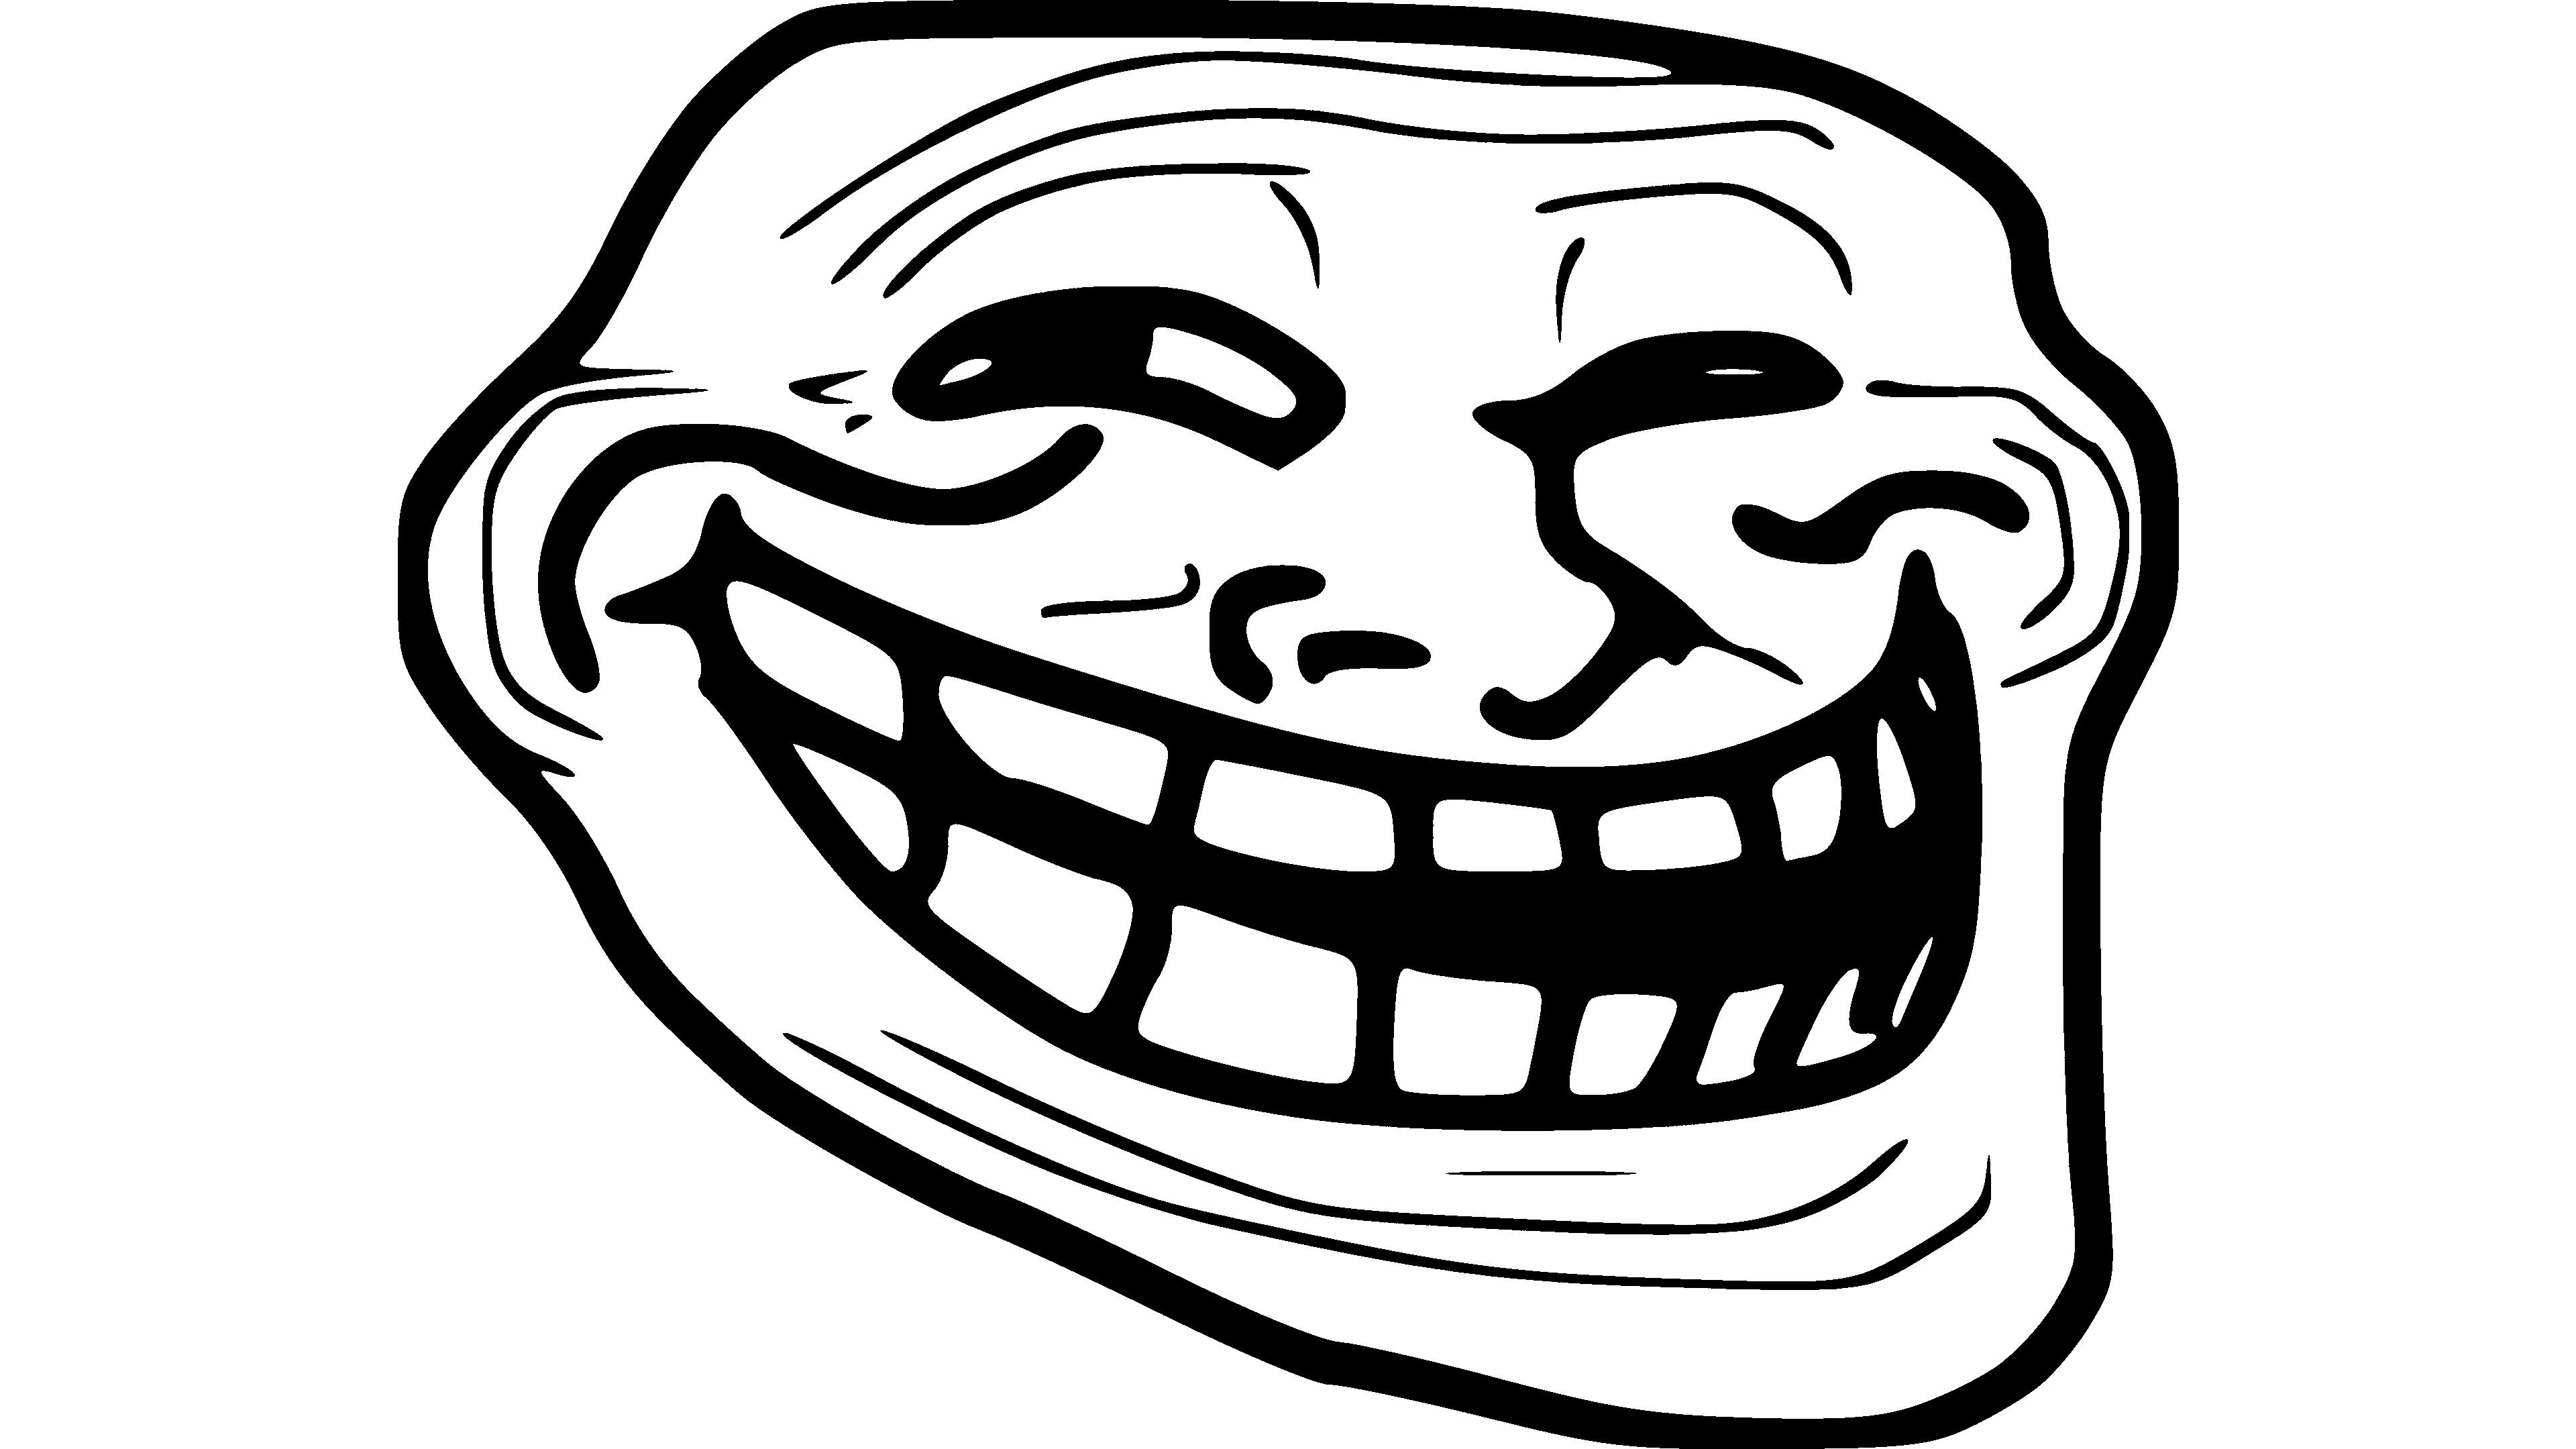

In [14]:
secret_img

### 2.- Escondiendo una nueva imagen

Es tu turno, ahora tu esconderás una imagen. Las instrucciones son las siguientes:

2.1 Selecciona una imagen de 2160 x 3840 pixeles (a.k.a resolución 4k), lo importante es que sea solo en blanco y negro, en la carpeta `images` se disponibiliza como ejemplo la imagen `black_and_white_example.jpg` y crea una variable llamada `my_img` leyendo la imagen seleccionada con `Image.open()`.

In [15]:
my_img = Image.open("/content/drive/My Drive/Tarea 1 aplica/foto.png").convert('L') #Agrgamos el .convert('L') para indicar que es una imagen en escala de grises y que asi la dimension del arreglo sea solo de 2

2.2 Crea un arreglo llamado `my_img_np` utilizando `my_img` y el método `np.array()`.
    * Es importante que `my_img_np.shape` sea `(2160, 3840)`, es decir, que solo sea de dos dimensiones. Esto porque es una imagen en blanco y negro, no necesitando el modelo RGB.

In [16]:
my_img_np = np.array(my_img)
print(my_img_np.shape)

(2160, 3840)


2.3 Crear la variable `my_img_np_aux` utilizando un _umbral_ con tal de que:
    - 1: Si el valor del pixel es mayor  al _umbral_.
    - 0: Si el valor del pixel es menor o igual al _umbral_.
    - El `dtype` debe ser `np.uint8`.
    - Para `black_and_white_example.jpg` un umbral adecuado es `20`.

In [17]:
umbral = 120
my_img_np_aux = (my_img_np > umbral).astype(np.uint8)

Puedes probar que tan bien quedó la imagen con la siguiente linea. Si crees que no se ve bien, puedes cambiar el _umbral_.

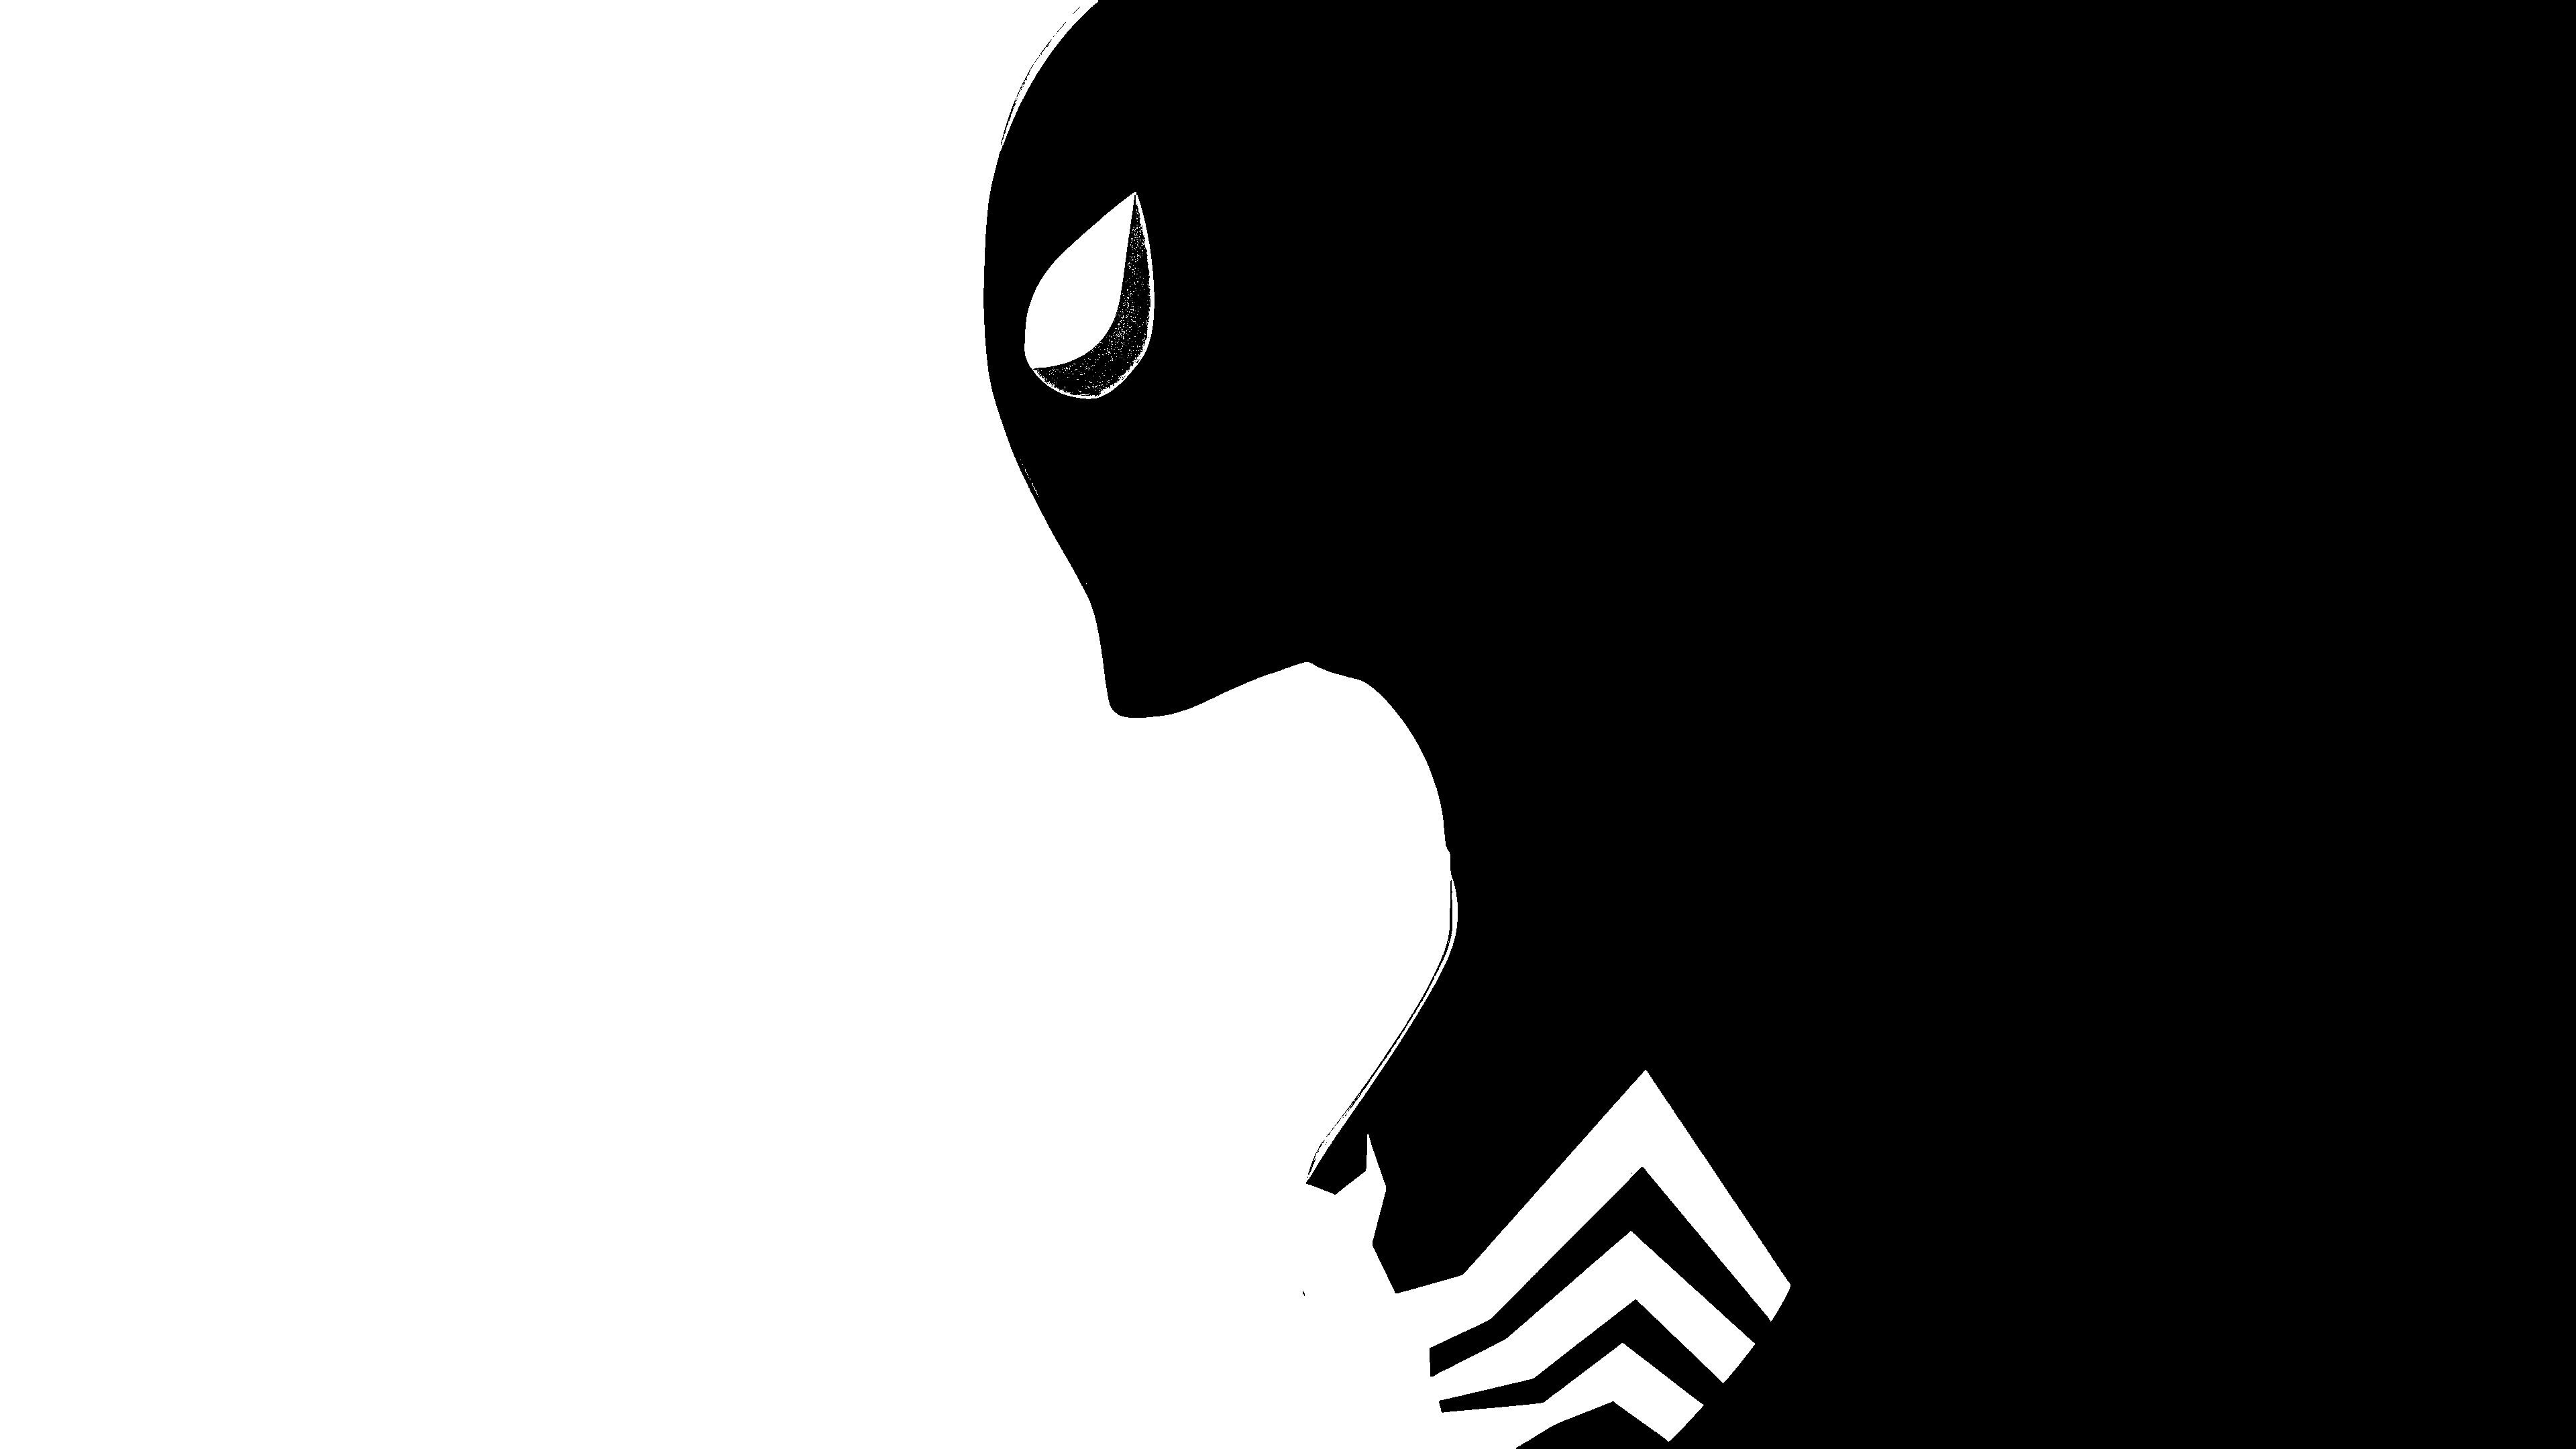

In [18]:
Image.fromarray(my_img_np_aux * 255)

2.4 Dividir la imagen en tres arreglos de tamaño (2160, 1280) y guardarlos en una lista con el nombre `my_img_split`. Hint: Revisa en la documentación de `numpy`.

In [19]:
my_img_split = np.array_split(my_img_np_aux, 3, axis=1)

Revisa utilizando la siguiente iteración.

In [20]:
for img_array in my_img_split:
    print(img_array.shape)

(2160, 1280)
(2160, 1280)
(2160, 1280)


2.5 La imagen donde se esconderá tu imagen selecionada está en la carpeta `images` con el nombre `gatito_original.png`, que sospechosamente es de 2160 x 1280 pixeles. Carga la imagen en la variable `cat` y luego crea arreglo `cat_np` utilizando `cat`. Verifica que `cat_np.shape = (2160, 1280, 3)`.

In [21]:
cat = Image.open("/content/drive/My Drive/Tarea 1 aplica/gatito_original.png")
cat_np = np.array(cat)
print(cat_np.shape)

(2160, 1280, 3)


2.6 Convierte todos los valores de `cat_np` a valores pares. Esto lo puedes hacer sumando 1 a cada valor de arreglo si es impar

In [22]:
cat_np[cat_np % 2 != 0] += 1

2.7 Itera por canal RGB de `cat_np` y en cada capa suma los valores de uno de los arreglos de `my_img_split`.

In [23]:
for channel in range(cat_np.shape[2]):
    cat_np[:, :, channel] += my_img_split[channel]

2.8 Crea una variable llamada `cat_secret_im` con `Image.fromarray` y la variable `cat_np` (que ya ha sido modificada). Luego guarda la imagen en la carpeta `images` con el nombre `my_secret.png`.

In [24]:
cat_secret_im = Image.fromarray(cat_np)
cat_secret_im.save("/content/drive/My Drive/Tarea 1 aplica/my_secret.png")

2.9 Crea una función llamada `imagenception()` que como argumento tenga la ruta de la imagen que quieres descifrar y que descifre la imagen secreta recientemente creada. Hint: Utiliza todos los pasos de la primera parte.

In [25]:
def imagenception(filepath):
    img = Image.open(filepath)
    img_np = np.array(img) # Convertimos la imagen a un arreglo
    #Vamos a repetir los pasos que usamos para encontrar la imagen del ejemplo
    secret_list_func = []
    #Iterar por cada canal RGB
    for channel in range(img_np.shape[2]):
        #Crear arreglo temporal con 0 si es par, 1 si es impar
        secret_aux_func = img_np[:, :, channel] % 2
        #Escalar a valores 0 y 255
        secret_aux_func = secret_aux_func * 255
        #Cambiar dtype a np.uint8
        secret_aux_func = secret_aux_func.astype(np.uint8)
        #Agregar a la lista
        secret_list_func.append(secret_aux_func)
    #Concatenar horizontalmente los arreglos
    secret_np_func = np.concatenate(secret_list_func, axis=1)
    #Crear el objeto Image a partir del arreglo
    secret_img_func = Image.fromarray(secret_np_func)
    return secret_img_func

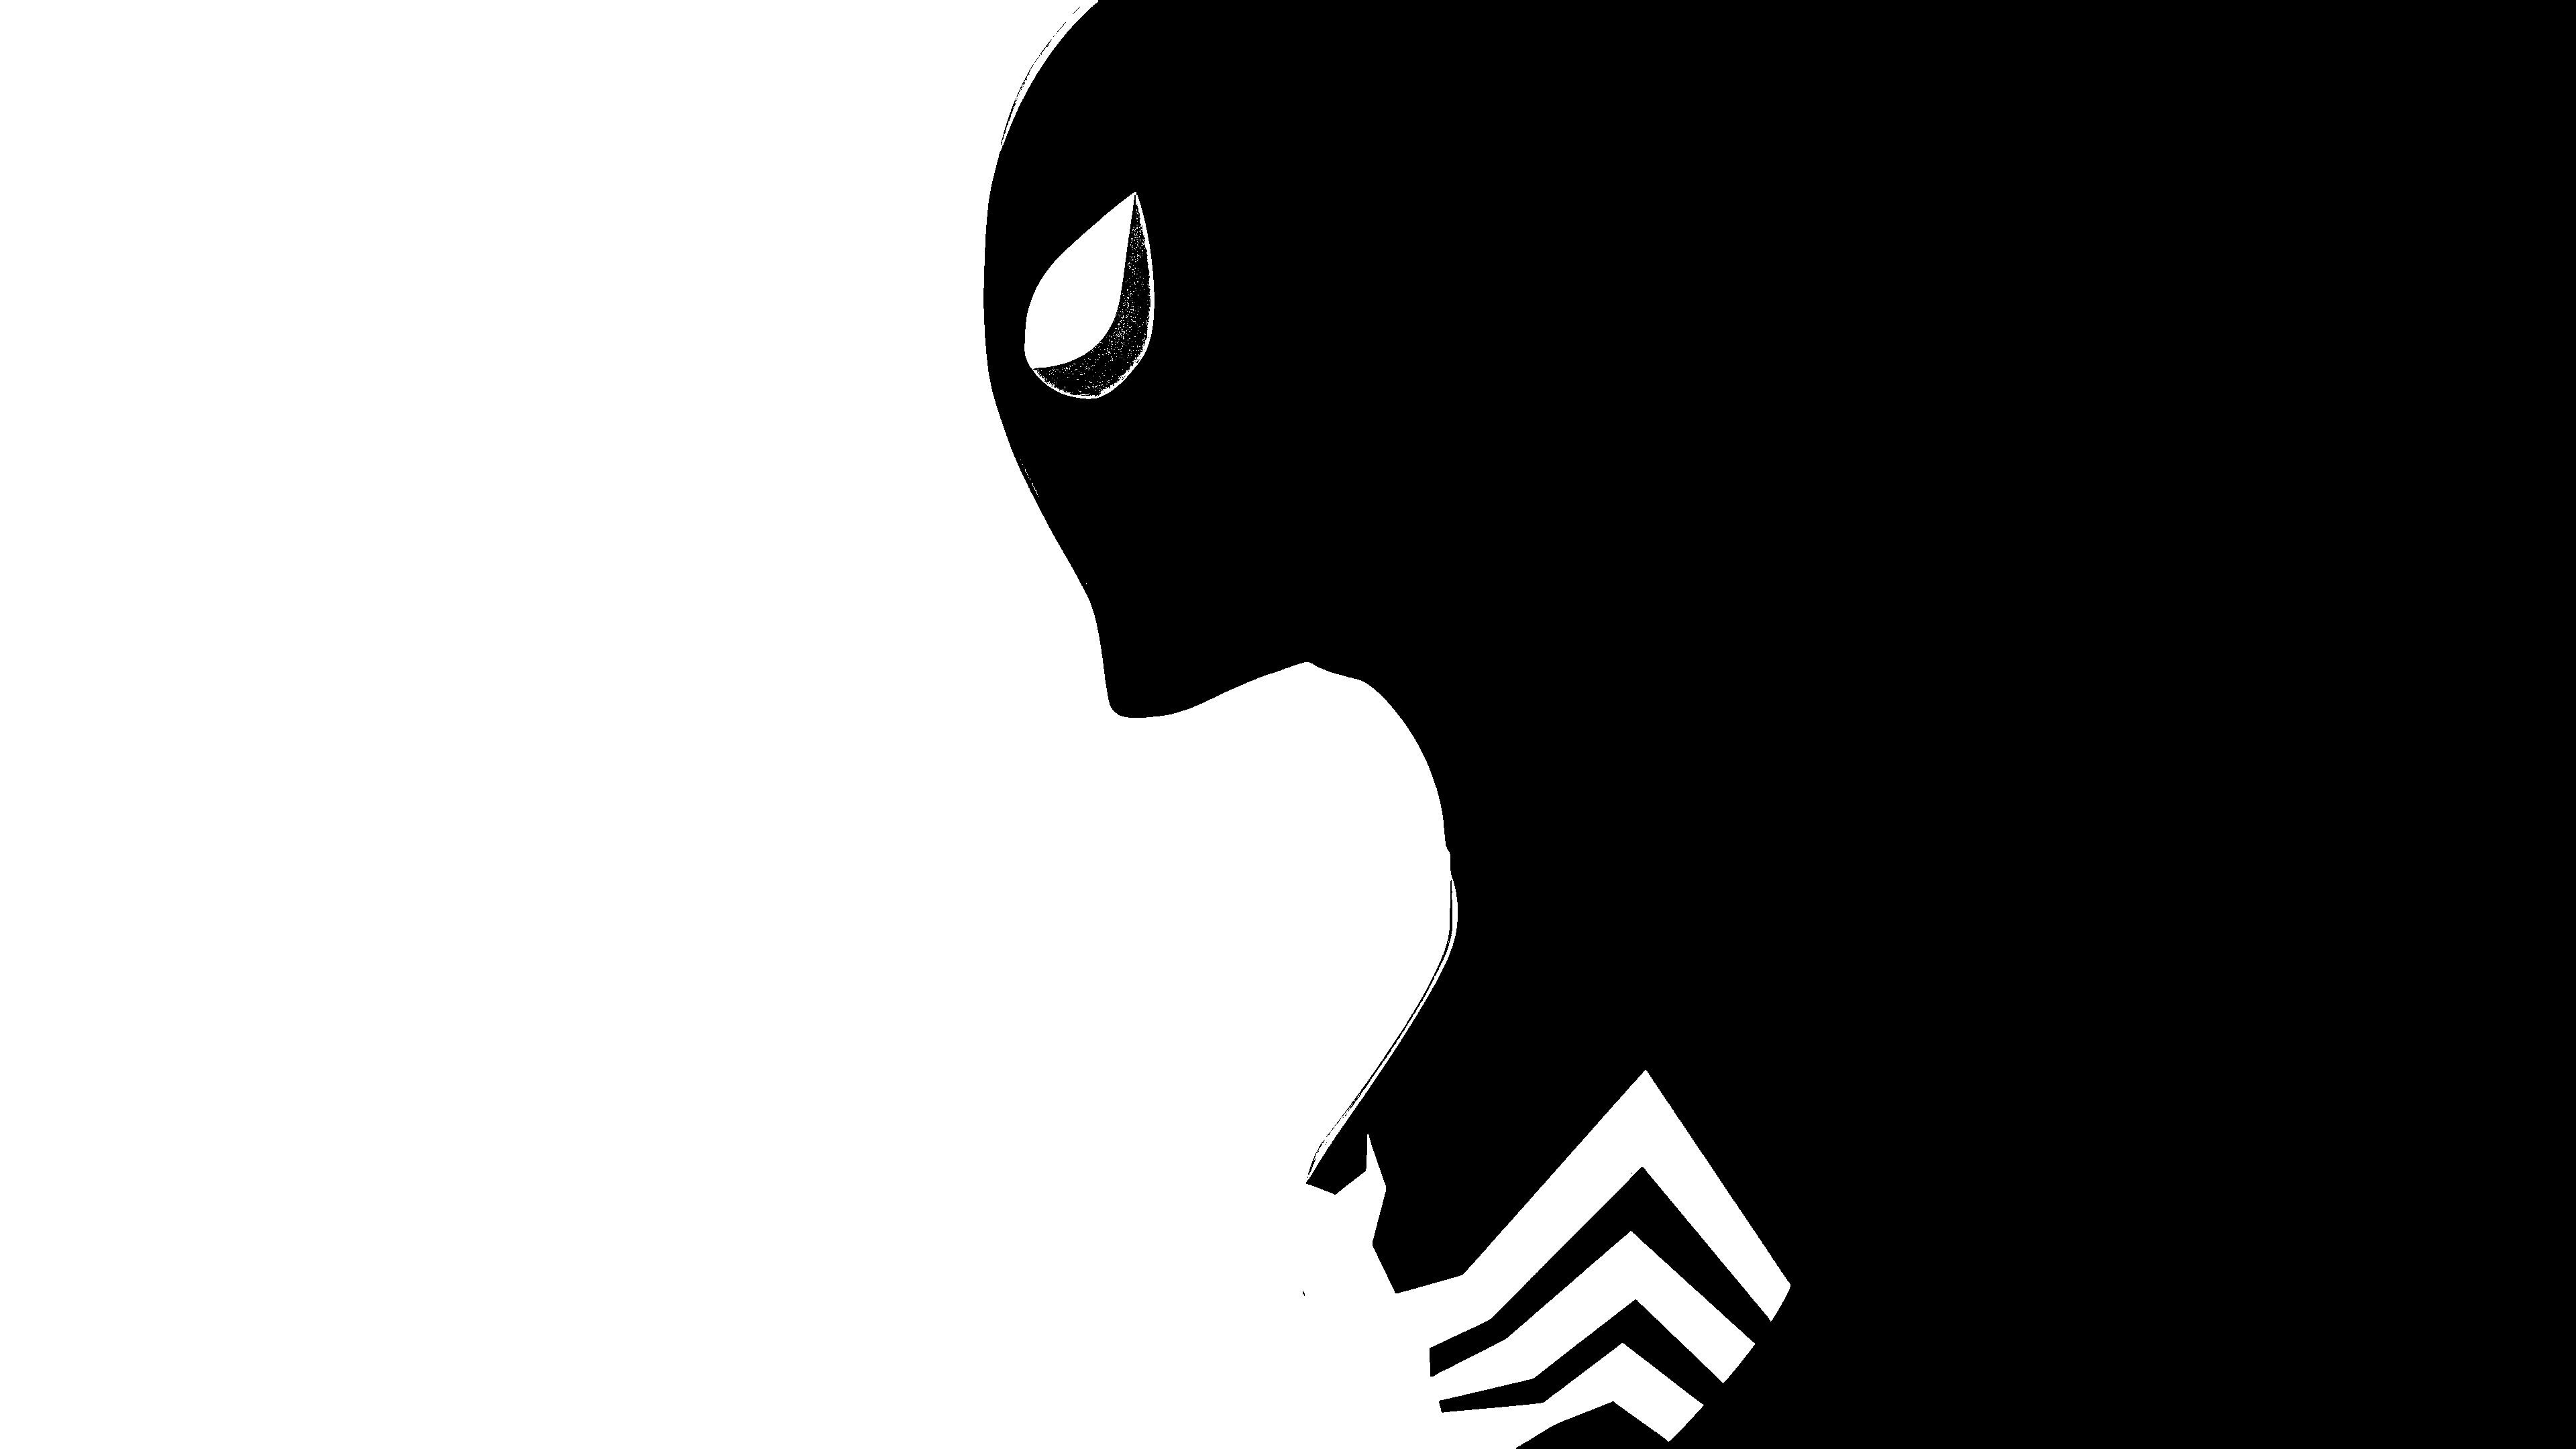

In [26]:
my_secret_img = imagenception("/content/drive/My Drive/Tarea 1 aplica/my_secret.png")
my_secret_img

## II.- Analizando la Felicidad

<img src="https://static01.nyt.com/images/2019/09/29/opinion/sunday/29HolsonStill/29HolsonStill-popup.jpg" width="480" height="360" align="center"/>

Este ejercicio es netamente análisis de datos, tratando de abarcar problemas típicos como la lectura de datos, corrección de errores, métricas agrupadas, unión de datos, etc. Utilizaremos un conjunto de datos llamado __World Happiness Report__ disponible en el siguiente [link](https://www.kaggle.com/unsdsn/world-happiness), de donde se puede obtener información al respecto.

#### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


### 2.1 Lectura de datos

In [27]:
# libraries
import pandas as pd
pd.set_option("display.max_columns", 999)  # Permite mostrar hasta 999 columnas de un DataFrame en Jupyter.

En la carpeta `data/world-happiness` se disponen de tres archivos, uno por cada reporte anual (años 2015, 2016 y 2017). No es de sorprender que envíen un archivo por año (podría ser mensual, semestral, etc.), lo imortante es ser capaces de leer una cantidad __variable__ de archivos al mismo tiempo. Una buena práctica es crear un diccionario de dataframes.

In [28]:
# Comprehension dictionary
df_dict = {
    year: pd.read_csv(f"/content/drive/My Drive/Tarea 1 aplica/world-happiness/{year}.csv").assign(Year=year)
    for year in [2015, 2016, 2017]
}

Por ejemplo, se puede acceder al DataFrame asociado al archivo `data/world-happiness/2016.csv` de la siguiente manera:

Una pequeña descripción de las columnas

* `Country` Name of the country.
* `Region` Region the country belongs to.
* `Happiness Rank` Rank of the country based on the Happiness Score.
* `Happiness Score` A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* `Standard Error` The standard error of the happiness score.
* `Economy (GDP per Capita)` The extent to which GDP contributes to the calculation of the Happiness Score.
* `Family` The extent to which Family contributes to the calculation of the Happiness Score
* `Health (Life Expectancy)` The extent to which Life expectancy contributed to the calculation of the Happiness Score
* `Freedom` The extent to which Freedom contributed to the calculation of the Happiness Score.
* `Trust (Government Corruption)` The extent to which Perception of Corruption contributes to Happiness Score.
* `Generosity` The extent to which Generosity contributed to the calculation of the Happiness Score.
* `Dystopia Residual` The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Notar que los conjuntos de datos no poseen las mismas columnas, por lo tanto, solo se trabajarán con las columnas en común y posteriormente agregaremos el año con tal de concatenar los tres conjuntos.

In [29]:
from functools import reduce
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist()
print(intersection_columns)

['Country', 'Dystopia Residual', 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity', 'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Year']


Explica con tus palabras las operaciones que se realizaron para obtener la variable `intersection_columns`.

__Respuesta:__ < Lo primero que se hace es ingresar al contenido del diccionario con df_dict.values()  un for df_i in df_dict.values(), donde df_i representa la i-esima llave del diccionario, luego a cada df se le seleccionan las columnas con df_i.columns.values creando un arreglo en numpy con las columnas de cada diccionario, luego se le aplica la funcion np.intersect1d() a dicho arreglo para encontrar las columnas en comun, o la interseccion de las columnas, luego se aplica reduce() en caso de que alguna columna se repitiera (creo porque sino no me explico para que es) y finalmente se le aplica un .tolist() para convertir el arreglo en numpy a una lista de python. >

### 2.2 Concatenación y procesado

Define el DataFrame `happiness` tal que:

* Sea la concatenación de los dataframes de `df_dict`
* Resetea los índices.
* Selecciona solo las columnas de la lista `intersection_columns`.
* Los nombres de las columnas deben estar en minísculas, reemplazar espacios por guiones bajos (`_`) y elimina los paréntesis.


In [30]:
happiness = (
    pd.concat(df_dict)
    .reset_index(drop=True)
    .loc[:, intersection_columns]
    .rename(columns=lambda x: x.lower().replace(" ", "_").replace("(", "").replace(")", ""))
)
happiness.head()

,country,dystopia_residual,economy_gdp_per_capita,family,freedom,generosity,happiness_rank,happiness_score,health_life_expectancy,trust_government_corruption,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,0.32957,2015


### 2.3 Análisis

Como siempre, partimos con un análisis descriptivo simple.

In [31]:
happiness.describe(include="all").fillna("").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,470,166,Switzerland,3,,,,,,,
dystopia_residual,470.0,,,,2.092717,0.565772,0.32858,1.737975,2.09464,2.455575,3.83772
economy_gdp_per_capita,470.0,,,,0.92783,0.415584,0.0,0.605292,0.995439,1.252443,1.870766
family,470.0,,,,0.990347,0.318707,0.0,0.793,1.025665,1.228745,1.610574
freedom,470.0,,,,0.402828,0.150356,0.0,0.297615,0.418347,0.51685,0.66973
generosity,470.0,,,,0.242241,0.131543,0.0,0.152831,0.22314,0.315824,0.838075
happiness_rank,470.0,,,,78.829787,45.281408,1.0,40.0,79.0,118.0,158.0
happiness_score,470.0,,,,5.370728,1.136998,2.693,4.509,5.2825,6.23375,7.587
health_life_expectancy,470.0,,,,0.579968,0.240161,0.0,0.402301,0.630053,0.768298,1.02525
trust_government_corruption,470.0,,,,0.13479,0.111313,0.0,0.059777,0.099502,0.173161,0.55191


¿Cuántos países no tienen mediciones de felicidad en los tres años del estudio? ¿Cuáles son?

In [32]:
total_paises= happiness['country'].value_counts()
paises_sin_datos = total_paises[total_paises < 3].index.tolist()
print(f"Paises sin datos: {len(paises_sin_datos)}")
print(paises_sin_datos)

Paises sin datos: 20
['South Sudan', 'Taiwan', 'Suriname', 'Hong Kong', 'Namibia', 'Somalia', 'Lesotho', 'Laos', 'Mozambique', 'Belize', 'Central African Republic', 'Comoros', 'Oman', 'Somaliland region', 'Swaziland', 'Djibouti', 'Somaliland Region', 'Puerto Rico', 'Taiwan Province of China', 'Hong Kong S.A.R., China']


In [33]:
## FIX ME ##

__Respuesta__: < Hay 20 paises sin datos y son 'South Sudan', 'Taiwan', 'Suriname', 'Hong Kong', 'Namibia', 'Somalia', 'Lesotho', 'Laos', 'Mozambique', 'Belize', 'Central African Republic', 'Comoros', 'Oman', 'Somaliland region', 'Swaziland', 'Djibouti', 'Somaliland Region', 'Puerto Rico', 'Taiwan Province of China', 'Hong Kong S.A.R., China'>

Note que la lista de países proveniente de la pregunta anterior tiene errores de consistencia, por ejemplo están los registros de `Hong Kong` y `Hong Kong S.A.R., China` que escencialmente son el mismo. Lo mismo ocurre con `Taiwan` y `Somaliland Region`.

Modifique la columna `country` del dataframe `happiness` con tal de reparar los errores de `Hong Kong`, `Taiwan` y `Somaliland Region`.

In [34]:
bad_country_names_dict = {"Hong Kong S.A.R., China": "Hong Kong", 'Somaliland Region': 'Taiwan' }
happiness = happiness.assign(country=happiness["country"].replace(bad_country_names_dict))

Luego de la modificación, ¿Cuántos países no tienen mediciones en los tres años de estudio?

In [35]:
total_paises= happiness['country'].value_counts()
paises_sin_datos = total_paises[total_paises < 3].index.tolist()
print(f"Paises sin datos: {len(paises_sin_datos)}")
print(paises_sin_datos)

Paises sin datos: 16
['Belize', 'South Sudan', 'Mozambique', 'Lesotho', 'Suriname', 'Laos', 'Central African Republic', 'Comoros', 'Somalia', 'Namibia', 'Oman', 'Somaliland region', 'Djibouti', 'Swaziland', 'Puerto Rico', 'Taiwan Province of China']


Pivotea el dataframe `happines` tal que los índices sean los años, las columnas los países y el valor su `happiness_score`. LLena los valores nulos con un _string_ vacío `""`. Un país no puede tener más de un registro por año, por lo que puedes utilizar directamente el médoto `pd.DataFrame.pivot()`.


In [36]:
pivot = happiness.pivot_table(index="year", columns="country", values="happiness_score").fillna("") #use pivo_table en vez de pivot porque al intetar usar pivot decia que habia entradas duplicadas
pivot

country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Croatia,Cyprus,Czech Republic,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macedonia,Madagascar,Malawi,Malaysia,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Cyprus,Norway,Oman,Pakistan,Palestinian Territories,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,Somaliland region,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Taiwan Province of China,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,3.575,4.959,5.605,4.033,6.574,4.350,7.284,7.200,5.212,5.960,4.694,5.813,6.937,,3.340,5.253,5.890,4.949,4.332,6.983,4.218,3.587,2.905,3.819,4.252,7.427,3.678,3.667,6.670,5.140,6.477,3.956,3.989,4.517,7.226,5.759,5.689,6.505,7.527,4.369,4.885,5.975,4.194,6.130,5.429,4.512,7.406,6.575,3.896,4.297,6.750,4.633,4.857,6.123,3.656,4.518,4.788,5.474,4.800,7.561,4.565,5.399,4.686,4.677,6.940,7.278,5.948,3.655,5.709,5.987,5.192,5.855,4.419,5.589,6.295,5.286,4.876,5.098,4.839,4.898,4.571,5.754,5.833,6.946,5.007,3.681,4.292,5.770,3.995,6.302,4.436,5.477,7.187,5.889,4.874,5.192,5.013,4.971,4.307,,4.514,7.378,7.286,5.828,3.845,5.268,5.695,7.522,6.853,5.194,4.715,6.786,5.878,5.824,5.073,5.791,5.102,,6.611,5.124,5.716,3.465,6.411,3.904,5.123,4.507,6.798,5.995,5.848,,5.057,4.642,5.984,,6.329,4.271,4.550,6.269,4.867,7.364,7.587,3.006,6.298,,4.786,3.781,6.455,2.839,6.168,4.739,5.332,5.548,3.931,4.681,6.901,6.867,7.119,6.485,6.003,6.810,5.360,4.077,5.129,4.610
2016,3.360,4.655,6.355,3.866,6.650,4.360,7.313,7.119,5.291,6.218,4.643,5.802,6.929,5.956,3.484,5.196,5.822,5.163,3.974,6.952,4.217,3.739,2.905,3.907,4.513,7.404,,3.763,6.705,5.245,6.481,3.956,4.236,4.272,7.087,5.488,5.546,6.596,7.526,,5.155,5.976,4.362,6.068,5.517,4.508,7.413,6.478,4.121,4.252,6.994,4.276,5.033,6.324,3.607,4.028,4.871,5.458,5.145,7.501,4.404,5.314,4.813,4.575,6.907,7.267,5.977,3.916,5.510,5.921,5.303,5.919,4.356,5.401,6.239,5.185,4.876,5.560,5.129,,3.622,5.615,5.813,6.871,5.121,3.695,4.156,6.005,4.073,6.488,4.201,5.648,6.778,5.897,4.907,5.161,5.151,,4.395,4.574,4.793,7.339,7.334,5.992,3.856,4.875,5.771,7.498,,5.132,4.754,6.701,5.538,5.743,5.279,5.835,5.123,7.039,6.375,5.528,5.856,3.515,6.379,4.219,5.177,4.635,6.739,6.078,5.768,5.44,,4.459,5.835,3.832,6.361,4.415,4.139,6.269,,7.291,7.509,3.069,5.718,,4.996,3.666,6.474,3.303,6.168,5.045,5.389,5.658,3.739,4.324,6.573,6.725,7.104,6.545,5.987,6.084,5.061,3.724,4.795,4.193
2017,3.794,4.644,5.872,3.795,6.599,4.376,7.284,7.006,5.234,6.087,4.608,5.569,6.891,5.956,3.657,5.011,5.823,5.182,3.766,6.635,4.714,4.032,2.905,4.168,4.695,7.316,2.693,3.936,6.652,5.273,6.357,,4.291,4.280,7.079,5.293,5.621,6.609,7.522,,5.230,6.008,4.735,6.003,5.611,4.460,7.469,6.442,4.465,4.286,6.951,4.120,5.227,6.454,3.507,3.603,5.181,5.472,5.324,7.504,4.315,5.262,4.692,4.497,6.977,7.213,5

¿Qué información podrías sacar rápidamente de esta tabla pivoteada? ¿Podrías decir que siempre es útil pivotear una tabla?

__Respuesta:__  < Creo que lo que se puede ver rapidamente es la comparacion del indice de un mismo pais en los 3 años de informacion que se tienen, mas siento que no es muy util pivotear la tabla en este caso ya que son demasiadas columnas por lo que no se puede ver toda la informacion de buena manera >

En promedio, ¿Cuáles son los tres países con el mayor _score_ de felicidad?

In [37]:
promedio_paises =pivot.replace("", np.nan)
promedio_paises = promedio_paises.mean(axis=0).sort_values(ascending=False) #Para calcular el promedio debemos reemplazar los valores de strings vacios "" por np.nan que simboliza una casilla vacia para que a la hora de hacer el promedio no se considere
promedio_paises.head(3)

/tmp/ipython-input-1645544498.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  promedio_paises =pivot.replace("", np.nan)


,0
country,
Switzerland,7.530
Denmark,7.525
Iceland,7.522


__Respuesta:__  < Los paises con mayor indice son Suiza, Dinamarca e Islandia >

Calcula el promedio anual de todas las columnas factores de felicidad, es decir, todas las variables numéricas excepto `happiness_score` y `happiness_rank`.

In [38]:
hap_mean_factors = happiness.loc[:, (happiness.columns != "happiness_score") & (happiness.columns != "happiness_rank") & (happiness.columns != "country")].groupby("year").mean()
hap_mean_factors

,dystopia_residual,economy_gdp_per_capita,family,freedom,generosity,health_life_expectancy,trust_government_corruption
year,,,,,,,
2015,2.098977,0.846137,0.991046,0.428615,0.237296,0.630259,0.143422
2016,2.325807,0.953880,0.793621,0.370994,0.242635,0.557619,0.137624
2017,1.850238,0.984718,1.188898,0.408786,0.246883,0.551341,0.123120


Respecto al cálculo anterior, para cada uno de los años, ¿Cuál es el factor que más contribuye (en promedio) al _score_ de la felicidad y en qué medida?

In [39]:
factor_maximo= hap_mean_factors.idxmax(axis=1)
contribucion = hap_mean_factors.max(axis=1)
for año in hap_mean_factors.index:
    factor = factor_maximo[año]
    contribucion_valor = contribucion[año]
    print(f"En el año {año}, el factor que mas contribuye al score de felicidad es '{factor}' con una contribucion de {contribucion_valor:.3f}")

En el año 2015, el factor que mas contribuye al score de felicidad es 'dystopia_residual' con una contribucion de 2.099
En el año 2016, el factor que mas contribuye al score de felicidad es 'dystopia_residual' con una contribucion de 2.326
En el año 2017, el factor que mas contribuye al score de felicidad es 'dystopia_residual' con una contribucion de 1.850


__Respuesta:__  < En el año 2015, el factor que mas contribuye al score de felicidad es 'dystopia_residual' con una contribucion de 2.099

En el año 2016, el factor que mas contribuye al score de felicidad es 'dystopia_residual' con una contribucion de 2.326

En el año 2017, el factor que mas contribuye al score de felicidad es 'dystopia_residual' con una contribucion de 1.850>

### 2.4 Agregando más datos

A continuación, agregaremos un nuevo conjunto de datos, el que contiene estadísticas de suicidio por años, países y rangos etáreos. Se encuentra disponible en el siguiente [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [40]:
suicide = pd.read_csv("/content/drive/My Drive/Tarea 1 aplica/suicide_rates.csv")
suicide.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


La mayoría de las columnas son autoexplicativas.
* `country`
* `year`
* `sex`
* `age`
* `suicides_no`
* `population`
* `suicides/100k pop`
* `country-year`
* `HDI for year` Human Development Index
* `gdp_for_year ($)` Gross Domestic Product
* `gdp_per_capita ($)`
* `generation` based on age grouping average

Un poco de estadística descriptiva.

In [41]:
suicide.describe(include="all").fillna("").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Austria,382,,,,,,,
year,27820.0,,,,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
sex,27820,2,male,13910,,,,,,,
age,27820,6,15-24 years,4642,,,,,,,
suicides_no,27820.0,,,,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
population,27820.0,,,,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
suicides/100k pop,27820.0,,,,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
country-year,27820,2321,Uzbekistan2014,12,,,,,,,
HDI for year,8364.0,,,,0.776601,0.093367,0.483,0.713,0.779,0.855,0.944
gdp_for_year ($),27820,2321,"63,067,077,179",12,,,,,,,


Crea un nuevo DataFrame llamado suicide_agg siguiendo las siguientes instrucciones:

* Agrupa por país y año.
* Suma la población y el número de suicidios.
* Resetea los índices.
* Agrega una nueva columna llamada `suicides_ratio_100k` formada por la división de `suicides_no` y `population`, para posteriormente muliplicarla por 100,000.
* Agrega una nuevale columna llamada `suicides_rank` similar a `happiness_rank`, es decir, que asigne un orden __por año__ a cada país según la columna `suicides_ratio_100k` tal que el rank 1 corresponda al que tenga mayor `suicides_ratio_100k`. Hint: Usa el método `rank()`.

In [42]:
# Es posible hacer todas las operaciones encadenadas!
suicides_agg = (
    suicide.groupby(['country','year'])
    .agg({
        'population': 'sum',
        'suicides_no': 'sum'
    })
    .reset_index()
    .assign(
        suicides_ratio_100k=lambda x: (x['suicides_no'] / x['population']) * 100000,
        suicides_rank=lambda x: x.groupby('year')['suicides_ratio_100k'].rank(ascending=False, method='dense')
    )
)

Crea un nuevo DataFrame con el nombre `hap_sui` al unir `happiness` y `suicides_agg` tal que coincidan país y año, quédate con solo los registros que coincidan en ambas DataFrames.

In [43]:
hap_sui = pd.merge(happiness, suicides_agg, on=['country', 'year'], how='inner')
hap_sui.head()

,country,dystopia_residual,economy_gdp_per_capita,family,freedom,generosity,happiness_rank,happiness_score,health_life_expectancy,trust_government_corruption,year,population,suicides_no,suicides_ratio_100k,suicides_rank
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,0.41978,2015,7892502,1073,13.595182,22.0
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,0.14145,2015,308554,40,12.963695,24.0
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,0.48357,2015,5383060,564,10.477312,31.0
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,0.36503,2015,4882909,590,12.082961,26.0
4,Finland,2.61955,1.29025,1.31826,0.64169,0.23351,6,7.406,0.88911,0.41372,2015,5181797,731,14.107075,18.0


¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank`?

In [44]:
hap_sui.loc[:, ["happiness_rank", "suicides_rank"]].corr()

,happiness_rank,suicides_rank
happiness_rank,1.000000,0.038896
suicides_rank,0.038896,1.000000


Por alguna razon se observa una correlacion lineal positiva, pero es muy baja

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank` por cada año?

In [45]:
correlation_anual = hap_sui.groupby('year')[['happiness_rank', 'suicides_rank']].corr()
correlation_anual

happiness_rank  suicides_rank
year                                              
2015 happiness_rank        1.000000       0.101215
     suicides_rank         0.101215       1.000000
2016 happiness_rank        1.000000       0.022048
     suicides_rank         0.022048       1.000000

__Respuesta:__  < Nuevamente se observa una correlacion lineal positiva, en 2015 esta es bastante grande (10% aprox) lo cual es bastante extraño a mi interpretacion, mas en 2016 nuevamente es bastante baja>

¿La respuesta de las dos preguntas anteriores cambia si se utilizan las variables `happiness_score` y `suicides_ratio_100k`?

In [46]:
# Calculate the overall correlation between happiness_score and suicides_ratio_100k
correlacion2 = hap_sui.loc[:, ["happiness_score", "suicides_ratio_100k"]].corr()
correlacion2_anual = hap_sui.groupby('year')[['happiness_score', 'suicides_ratio_100k']].corr()
print(correlacion2)
print(correlacion2_anual)

                     happiness_score  suicides_ratio_100k
happiness_score             1.000000             0.021455
suicides_ratio_100k         0.021455             1.000000
                          happiness_score  suicides_ratio_100k
year                                                          
2015 happiness_score             1.000000             0.035262
     suicides_ratio_100k         0.035262             1.000000
2016 happiness_score             1.000000             0.025924
     suicides_ratio_100k         0.025924             1.000000


__Respuesta:__  < Se sigue observando una correlacion lineal positiva, pero esta vez es mas baja en todos los casos y en 2015 es considerablemente menor >

### III.- Índices de Costos de Vida

<img src="https://i.pinimg.com/originals/e7/dd/38/e7dd3861c4d30a2826515a8861300db7.png" width="480" height="360" align="center"/>

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio.

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar:

In [47]:
# instalar lxml
!pip install lxml

Se disponibiliza a continuación la carga de datos de un dataframe.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [ ]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[1]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

### Ejercicio 3.1

Explique lo que se hizo en la celda anterior detalladamente.

En primer lugar se estan concatenando los datos de todos los años, luego se esta poniendo el titulo de las columnas en minusculas y se reemplazan los espacios " " por guiones bajos "_", luego creamos una columna nueva llamada "rank" que enumera desde el 1 para hacer un ranking y luego se setea como el indice a la columna "rank".
Despues de concatenar tenemos un dataframe con un multindice que corresponde al año y al rank por lo que se renombran los indices y se hace un reset index para que las columnas year y rank sean columnas a las que se puede acceder de manera normal mediante un unico indice

### Ejercicio 3.2

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

In [ ]:
años = life_cost['year'].unique()

for año in años:
    df_año = life_cost[life_cost['year'] == año]
    plt.hist(df_año['cost_of_living_index'], bins=30, edgecolor='black')
    plt.xlabel('índice del costo de vida (sin alquiler)')
    plt.ylabel('Cantidad de ciudades')
    plt.title(f'Distribucion del indice del csoto de vida en {año}')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Se puede observar que en su mayoria el costo de la vida en general es menor al de Nueva York

### Ejercicio 3.3

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [ ]:
rol_seed = 202260564  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values

In [ ]:
my_cities_life_cost = life_cost[life_cost['city'].isin(my_cities)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=my_cities_life_cost, x='year', y='restaurant_price_index', hue='city', marker='o')
plt.xlabel('Año')
plt.ylabel('Indice de precio de Restaurant')
plt.title('Indice del precio de restaurant durante los años para ciudades seleccionadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Creo que no se ve una relacion muy clara, podria decirse que los indices se mantienen dentro de ciertos rangos para cada ciudad y no se grafican todas las ciudades porque quedaria un grafico demasiado saturado por la cantidad de ciudades que hay.